Surface Area ≈ 2.5276
Edge Length ≈ 12.6302


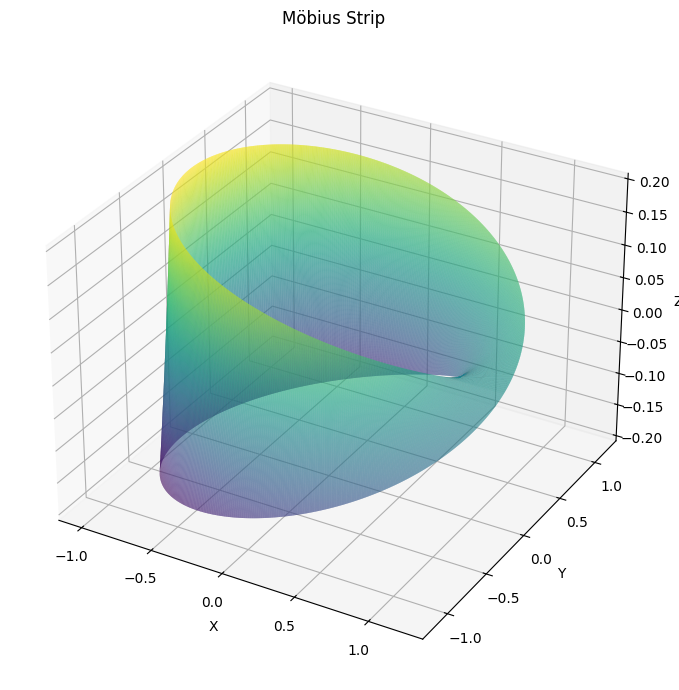

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.2, n=100):
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self._generate_mesh()

    def _generate_mesh(self):
        U, V = self.U, self.V
        half_U = U / 2
        X = (self.R + V * np.cos(half_U)) * np.cos(U)
        Y = (self.R + V * np.cos(half_U)) * np.sin(U)
        Z = V * np.sin(half_U)
        return X, Y, Z

    def surface_area(self):
        # Numerically approximate using finite differences on mesh
        du = 2 * np.pi / (self.n - 1)
        dv = self.w / (self.n - 1)
        # Partial derivatives
        Xu = np.gradient(self.X, du, axis=1)
        Yu = np.gradient(self.Y, du, axis=1)
        Zu = np.gradient(self.Z, du, axis=1)
        Xv = np.gradient(self.X, dv, axis=0)
        Yv = np.gradient(self.Y, dv, axis=0)
        Zv = np.gradient(self.Z, dv, axis=0)
        # Cross product
        Nx = Yu * Zv - Zu * Yv
        Ny = Zu * Xv - Xu * Zv
        Nz = Xu * Yv - Yu * Xv
        dA = np.sqrt(Nx**2 + Ny**2 + Nz**2) * du * dv
        return np.sum(dA)

    def edge_length(self):
        # Boundary curves at v = -w/2 and v = w/2
        edges = [self.V[0, :], self.V[-1, :]]
        length = 0.0
        for edge in edges:
            u_vals = self.u
            v_vals = edge
            x = (self.R + v_vals * np.cos(u_vals / 2)) * np.cos(u_vals)
            y = (self.R + v_vals * np.cos(u_vals / 2)) * np.sin(u_vals)
            z = v_vals * np.sin(u_vals / 2)

            dx = np.diff(x)
            dy = np.diff(y)
            dz = np.diff(z)

            ds = np.sqrt(dx**2 + dy**2 + dz**2)
            length += np.sum(ds)
        return length

    def plot(self):
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.9)
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    st = MobiusStrip(R=1.0, w=0.4, n=500)
    area = st.surface_area()
    edge_length = st.edge_length()

    print(f"Surface Area = {area:.4f}")
    print(f"Edge Length = {edge_length:.4f}")

    st.plot()